In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+164.ge460768.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 180
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [13]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    frontscan, backscan, groundscan = analysis.moduleAnalysis(scene, sensorsy=sensorsy, sensorsground=sensorsground)
    ground, back = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan, backscan)
    print(ground)
    for i, y in enumerate(ground['y']):
        if y <= -1 and y >= -1*pitch-1:
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Row2_Module10_Front
Linescan in process: groundscan2_Row2_Module10_Back
Saved: results/irr_groundscan2_Row2_Module10.csv
{'Wm2': [16.29818, 17.23106], 'x': [0.0, 6.980487e-16], 'y': [0.0, -5.7], 'z': [0.05, 0.05], 'r': [16.29818, 17.23106], 'g': [16.29818, 17.23106], 'b': [16.29818, 17.23106], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Row2_Module10_Front'}

sensorsground: 3
Linescan in process: groundscan3_Row2_Module10_Front
Linescan in process: groundscan3_Row2_Module10_Back
Saved: results/irr_groundscan3_Row2_Module10_Front.csv
Saved: results/irr_groundscan3_Row2_Module10_Back.csv
{'Wm2': [16.23847, 959.2258, 16.57353], 'x': [0.0, 3.490243e-16, 6.980487e-16], 'y': [0.0, -2.85, -5.7], 'z': [0.05, 0.05, 0.05], 'r': [16.23847, 959.2258, 16.57353], 'g': [16.23847, 959.2258, 16.57353], 'b': [16.23847, 959.2258, 16.57353], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Row2_Module10_F

Linescan in process: groundscan150_Row2_Module10_Back
Saved: results/irr_groundscan150_Row2_Module10_Front.csv
Saved: results/irr_groundscan150_Row2_Module10_Back.csv
{'Wm2': [16.61536, 16.62572, 16.63609, 17.80353, 18.6438, 19.48407, 22.21043, 23.28666, 24.362890000000004, 38.35545, 40.22757, 42.09968, 893.7247000000001, 898.1667000000001, 902.6087000000001, 932.7710000000001, 939.04, 945.3091, 946.6373, 948.817, 950.9966, 952.5981, 953.2922, 953.9863, 954.6803, 955.7675, 955.7896, 955.8118, 955.8339, 955.8560000000001, 955.8781, 955.9002, 955.9224, 955.9445, 958.8776000000001, 958.9081, 958.9386, 958.9692, 958.9997, 959.0303, 959.0607999999999, 959.0913, 959.1219, 959.1525, 959.183, 959.2135, 959.6538, 959.652, 959.6501, 959.6483, 959.6464, 959.6446, 959.6428, 959.6409, 959.639, 959.6372, 959.6354, 959.6335, 959.6317, 959.6298, 959.628, 959.6262, 959.6243, 959.6223999999999, 959.6205999999999, 959.3149, 959.3168, 959.3187000000001, 959.3206999999999, 959.3226, 959.3245000000001, 959.

Linescan in process: groundscan200_Row2_Module10_Back
Saved: results/irr_groundscan200_Row2_Module10_Front.csv
Saved: results/irr_groundscan200_Row2_Module10_Back.csv
{'Wm2': [16.64076, 16.60518, 16.5696, 16.81433, 17.19454, 17.57476, 19.72548, 20.44775, 21.17002, 25.11, 26.016720000000003, 26.92343, 38.08186, 39.47743, 40.873, 73.67609, 879.248, 881.9415, 917.3641000000001, 921.5611, 925.7581, 936.837, 940.813, 944.7891, 948.765, 948.5609, 949.7637, 950.9666000000001, 952.1695999999998, 953.3723999999999, 954.023, 954.2893, 954.5555, 954.8218, 955.0881, 955.3544, 955.6205999999999, 957.1283, 957.1178, 957.1073, 957.0967, 957.0862000000001, 957.0757, 957.0652, 957.0547, 957.0441999999999, 957.0336000000001, 957.0231, 959.4474, 959.4465, 959.4456, 959.4446000000002, 959.4437000000001, 959.4428000000001, 959.4419000000001, 959.4409, 959.44, 959.4391, 959.4382, 959.4373, 959.4363, 959.4354, 959.4344, 959.4335, 959.6829000000001, 959.679, 959.6749999999998, 959.6711, 959.6672, 959.6633, 95

Linescan in process: groundscan250_Row2_Module10_Back
Saved: results/irr_groundscan250_Row2_Module10_Front.csv
Saved: results/irr_groundscan250_Row2_Module10_Back.csv
{'Wm2': [16.2781, 16.36274, 16.44738, 16.53201, 17.18833, 17.54679, 17.90525, 18.26372, 19.83476, 20.41519, 20.99562, 21.576039999999995, 26.70175, 27.46491, 28.22807, 28.99123, 44.03975, 45.321769999999994, 46.60379, 850.7643000000002, 893.2076000000001, 895.8278, 898.4479, 901.0679999999999, 927.1947999999999, 930.7064, 934.218, 937.7297, 942.6702, 944.8164, 946.9627, 949.109, 951.2552, 950.4554000000002, 951.1108, 951.7662999999999, 952.4218, 953.0772000000001, 953.7327, 954.3881, 955.0435000000001, 955.9528999999999, 955.9784, 956.0039, 956.0294, 956.0549, 956.0804000000002, 956.1060000000001, 956.1315, 956.157, 956.1826, 956.2081, 956.2336, 956.2590999999999, 956.2846, 956.3101, 956.3357, 956.3611999999999, 958.5251, 958.541, 958.5567, 958.5724999999999, 958.5883, 958.6041, 958.6198, 958.6356, 958.6514000000001, 958.

Linescan in process: groundscan300_Row2_Module10_Back
Saved: results/irr_groundscan300_Row2_Module10_Front.csv
Saved: results/irr_groundscan300_Row2_Module10_Back.csv
{'Wm2': [16.69611, 16.72571, 16.75531, 16.78491, 16.81451, 16.84411, 16.87371, 18.13489, 18.5157, 18.8965, 19.27731, 19.65811, 22.37512, 22.91109, 23.44705, 23.98302, 24.51898, 33.73143, 34.55453, 35.37762, 36.20071, 37.0238, 67.15012, 871.6533, 873.2781, 874.9028, 876.5276, 916.9771999999999, 919.7229000000001, 922.4686, 925.2144, 927.9600999999999, 938.3082, 940.6641, 943.0198, 945.3757, 947.7314, 947.7203, 948.6142999999998, 949.5084, 950.4024, 951.2963999999998, 952.1904, 953.0845, 953.9785, 954.8725, 955.7665000000001, 956.6605, 955.4487, 955.5173, 955.5858, 955.6543, 955.7228, 955.7913, 955.8597999999998, 955.9283, 955.9968, 956.0652999999999, 956.1339000000002, 956.2023, 956.2709, 956.3394, 958.8879000000001, 958.8977, 958.9074999999999, 958.9173, 958.9271, 958.9369, 958.9467, 958.9564, 958.9662, 958.976, 958.9858,

Linescan in process: groundscan400_Row2_Module10_Back
Saved: results/irr_groundscan400_Row2_Module10_Front.csv
Saved: results/irr_groundscan400_Row2_Module10_Back.csv
{'Wm2': [16.43542, 16.44506, 16.4547, 16.46435, 16.47399, 16.48363, 17.29779, 17.53286, 17.76793, 18.00299, 18.23806, 18.47312, 18.70819, 19.9273, 20.29136, 20.65542, 21.01948, 21.383529999999997, 21.74759, 26.34761, 26.829400000000003, 27.311179999999997, 27.792960000000004, 28.27475, 28.75653, 41.25114, 42.00491, 42.75868, 43.51245, 44.26621, 45.01998, 884.1249000000001, 885.5933, 887.0615000000001, 888.5297999999999, 889.9981000000001, 891.4663999999999, 921.6367999999999, 923.6219, 925.607, 927.5921, 929.5771, 931.5623, 939.2190999999999, 941.0143000000002, 942.8096, 944.6047, 946.4, 948.1952, 949.9904, 948.6151, 949.2271999999999, 949.8393, 950.4514, 951.0634999999999, 951.6754999999999, 952.2876, 952.8997, 953.5117999999999, 954.1238, 954.736, 954.3042, 954.368, 954.4318, 954.4955999999999, 954.5594, 954.6232, 954.6

Linescan in process: groundscan500_Row2_Module10_Back
Saved: results/irr_groundscan500_Row2_Module10_Front.csv
Saved: results/irr_groundscan500_Row2_Module10_Back.csv
{'Wm2': [16.1997, 16.18004, 16.16038, 16.14072, 16.12106, 16.1014, 16.08174, 16.69914, 16.83284, 16.96655, 17.10025, 17.23395, 17.36766, 17.50136, 17.63507, 19.56743, 19.8517, 20.13596, 20.42022, 20.70448, 20.98875, 21.27301, 24.24103, 24.594219999999996, 24.947420000000005, 25.30062, 25.65382, 26.00702, 26.36022, 35.4651, 35.98039, 36.49569, 37.01099, 37.52629, 38.04158, 38.55688, 62.7286, 63.63681, 867.4235, 868.3317000000001, 869.2399, 870.1481, 871.0562999999999, 908.3062999999999, 909.8474, 911.3885, 912.9297, 914.4708, 916.0120000000001, 917.5531, 931.6545, 933.4932, 935.3318, 937.1704, 939.009, 940.8476999999999, 942.6863, 943.1475, 944.0477, 944.9479, 945.8482, 946.7485, 947.6487000000001, 948.549, 949.4492, 950.3494999999999, 950.8604, 951.1542, 951.448, 951.7418000000001, 952.0355, 952.3293, 952.623, 952.9169, 9

In [14]:
results

[16.76462,
 330.67926666666665,
 581.013836,
 761.954119,
 725.2531274999999,
 740.2581626666667,
 777.935588,
 780.8452735333334,
 778.5919642,
 783.2732422800001,
 784.1747852,
 782.888741525,
 785.2588531400002]

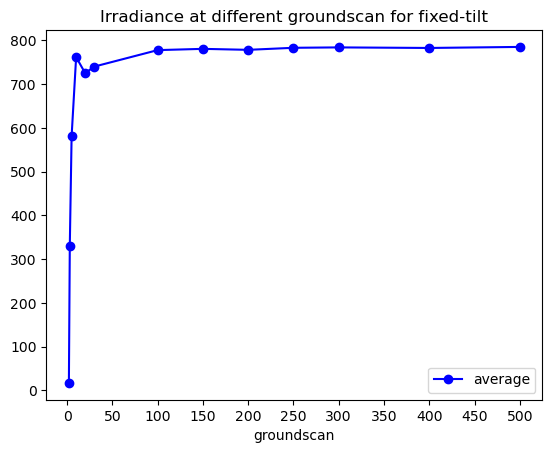

In [15]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()